In [3]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [24]:
# Define the training data
x_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
y_train = np.array([75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155])

print("x_train:", x_train)
print("y_train:", y_train)

x_train: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
y_train: [ 75  80  85  90  95 100 105 110 115 120 125 130 135 140 145 150 155]


In [25]:
# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")

x_train.shape: (17,)
Number of training examples is: 17


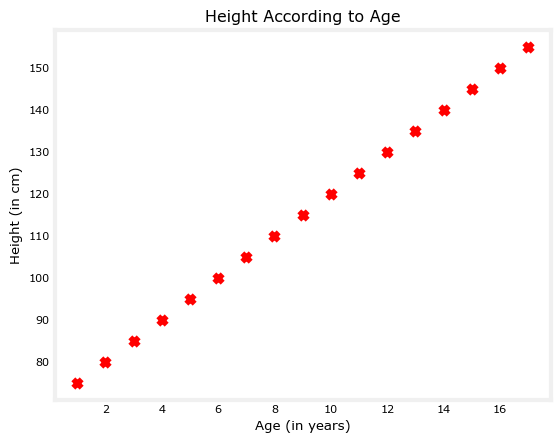

In [26]:
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r')
# Set the title
plt.title("Height According to Age")
# Set the y-axis label
plt.ylabel('Height (in cm)')
# Set the x-axis label
plt.xlabel('Age (in years)')
plt.show()

In [37]:
w = 5
b = 70
print(f"w: {w}")
print(f"b: {b}")

w: 5
b: 70


In [9]:
def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

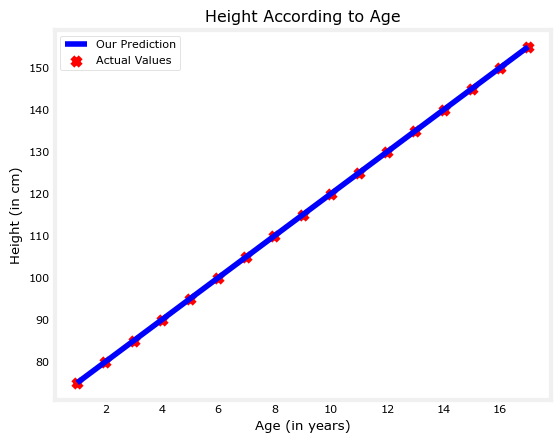

In [38]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Height According to Age")
# Set the y-axis label
plt.ylabel('Height (in cm)')
# Set the x-axis label
plt.xlabel('Age (in years)')
plt.legend()
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
plt.style.use('./deeplearning.mplstyle')

In [15]:
def compute_cost(x, y, w, b): 
    """
    Computes the cost function for linear regression.
    
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

In [31]:
plt_intuition(x_train,y_train)

interactive(children=(IntSlider(value=150, description='w', max=400, step=10), Output()), _dom_classes=('widge…

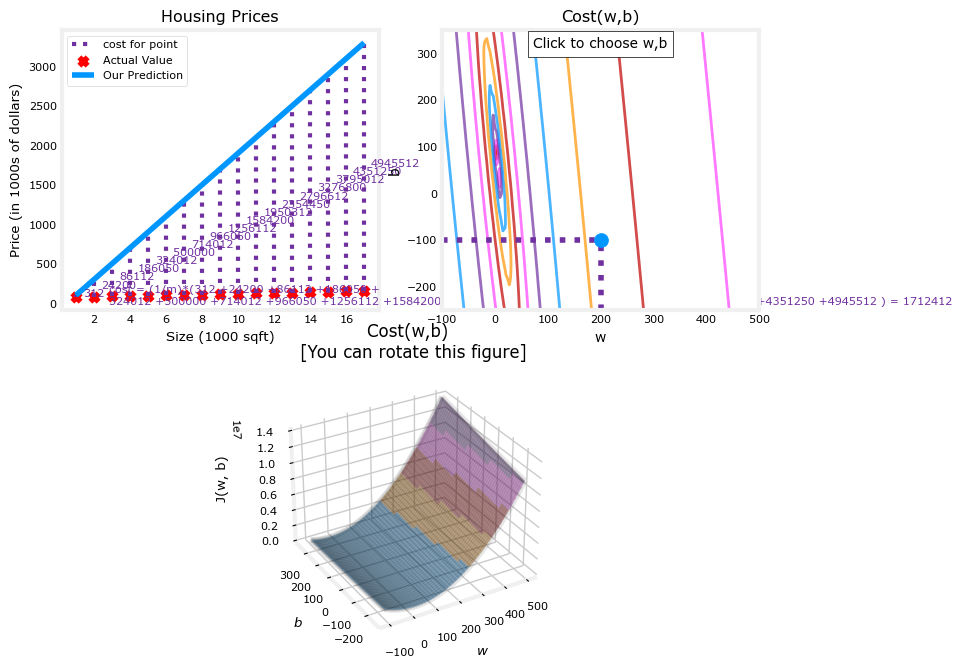

In [32]:
plt.close('all') 
fig, ax, dyn_items = plt_stationary(x_train, y_train)
updater = plt_update_onclick(fig, ax, x_train, y_train, dyn_items)

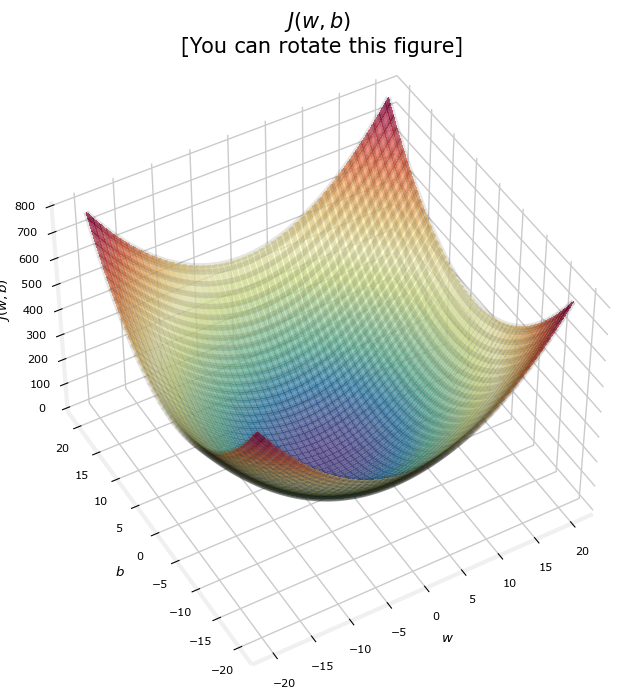

In [33]:
soup_bowl()

In [34]:
import math, copy
import numpy as np
import matplotlib.pyplot as plt
from lab_utils_uni import plt_house_x, plt_contour_wgrad, plt_divergence, plt_gradients

In [20]:
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

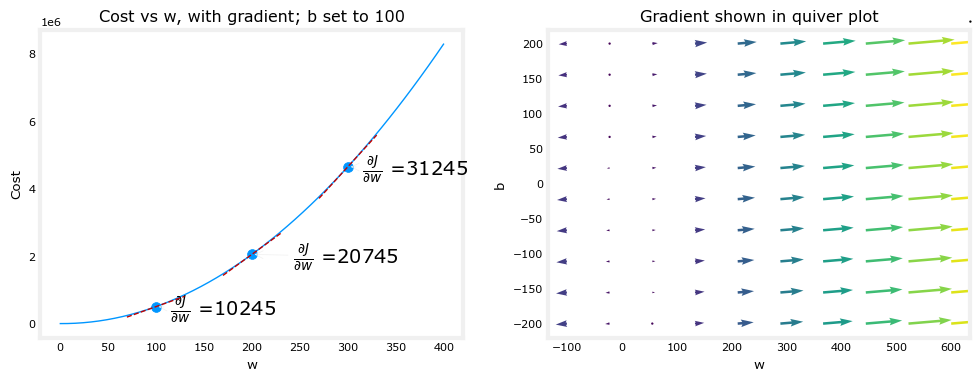

In [35]:
plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [22]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    w = copy.deepcopy(w_in) # avoid modifying global w_in
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [36]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha, 
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 5.64e+02  dj_dw: -1.155e+03, dj_db: -1.150e+02   w:  1.155e+01, b: 1.15000e+00
Iteration 1000: Cost 5.77e+00  dj_dw:  1.388e-01, dj_db: -1.616e+00   w:  5.611e+00, b: 6.28926e+01
Iteration 2000: Cost 6.14e-02  dj_dw:  1.432e-02, dj_db: -1.667e-01   w:  5.063e+00, b: 6.92669e+01
Iteration 3000: Cost 6.54e-04  dj_dw:  1.477e-03, dj_db: -1.720e-02   w:  5.006e+00, b: 6.99244e+01
Iteration 4000: Cost 6.95e-06  dj_dw:  1.524e-04, dj_db: -1.774e-03   w:  5.001e+00, b: 6.99922e+01
Iteration 5000: Cost 7.40e-08  dj_dw:  1.572e-05, dj_db: -1.830e-04   w:  5.000e+00, b: 6.99992e+01
Iteration 6000: Cost 7.87e-10  dj_dw:  1.621e-06, dj_db: -1.887e-05   w:  5.000e+00, b: 6.99999e+01
Iteration 7000: Cost 8.37e-12  dj_dw:  1.672e-07, dj_db: -1.947e-06   w:  5.000e+00, b: 7.00000e+01
Iteration 8000: Cost 8.91e-14  dj_dw:  1.725e-08, dj_db: -2.008e-07   w:  5.000e+00, b: 7.00000e+01
Iteration 9000: Cost 9.48e-16  dj_dw:  1.779e-09, dj_db: -2.071e-08   w:  5.000e+00, b: 7.00000e+01


In [39]:
print(f"21 year old height {w_final*21.0 + b_final:0.1f} cm")
print(f"51 year old height {w_final*51.0 + b_final:0.1f} cm")


21 year old height 175.0 cm
51 year old height 325.0 cm


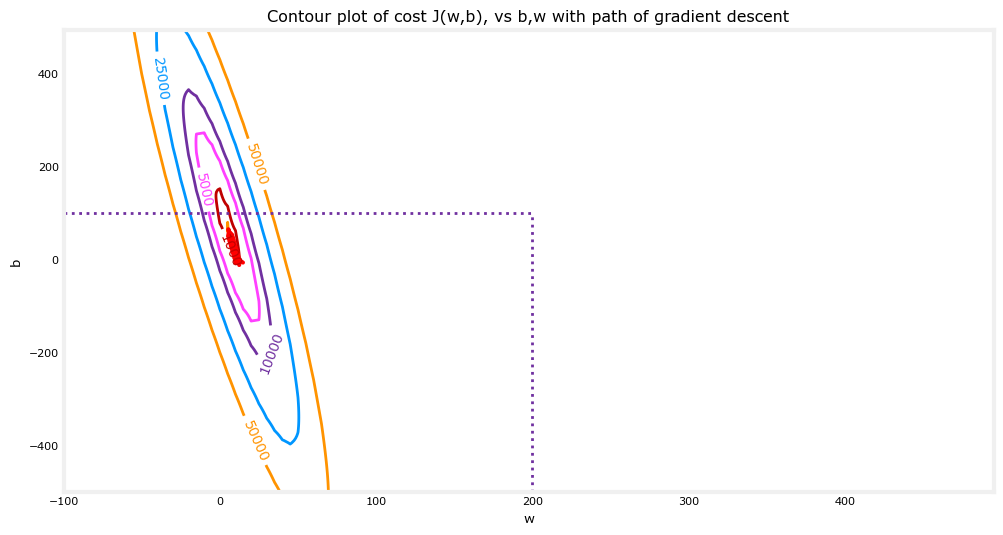

In [40]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_hist, ax)